In [1]:
import reader

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
import re
import pandas as pd

In [3]:
def make_box_plots(df, col_names):
    for col_name in col_names:
        plt.figure()
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        sns.violinplot(x=df[col_name], ax=ax1)
        sns.boxplot(x=df[col_name], ax= ax2)

def get_quantiles(series):    
    return [series.quantile(i) for i in [0,0.25,0.5,0.75,1]]

# separate numeric and non numeric values in columns
def get_numeric_from_string(string_value):
    try:
        result = float(string_value)
    except:
        result = float('nan')
    return result

def get_non_numeric_from_string(string_value):
    try:
        result = float(string_value)
        result = float('nan')
    except:
        result = string_value.upper().replace(" ", "")
    return result

In [4]:
data=reader.Data()

Local data read/write folder path:
	Default path: E:\anil\IIT Sop\Term02\MATH497\MATH497-DiabeticRetinopathy/data/

Data: all_person_data 
File: all_person_data_Richard_20170307.pickle
File already exists.

Data: all_encounter_data 
File: all_encounter_data_Richard_20170307.pickle
File already exists.


In [5]:
enc_df = data['all_encounter_data'].copy()
enc_df.columns.values

array(['Enc_Date', 'Person_Nbr', 'Primary_Payer', 'Smoking_Status',
       'MR_OD_SPH', 'MR_OD_CYL', 'MR_OD_AXIS', 'MR_OD_DVA', 'MR_OD_NVA',
       'MR_OS_SPH', 'MR_OS_CYL', 'MR_OS_AXIS', 'MR_OS_DVA', 'MR_OS_NVA',
       'BB_OD_SPH', 'BB_OD_CYL', 'BB_OD_AXIS', 'BB_OD_DVA', 'BB_OD_NVA',
       'BB_OS_SPH', 'BB_OS_CYL', 'BB_OS_AXIS', 'BB_OS_DVA', 'BB_OS_NVA',
       'CYCLO_OD_SPH', 'CYCLO_OD_CYL', 'CYCLO_OD_AXIS', 'CYCLO_OD_DVA',
       'CYCLO_OD_NVA', 'CYCLO_OS_SPH', 'CYCLO_OS_CYL', 'CYCLO_OS_AXIS',
       'CYCLO_OS_DVA', 'CYCLO_OS_NVA', 'Glucose', 'BMI', 'BP_Systolic',
       'A1C', 'BP_Diastolic', 'ME', 'MNPDR', 'DM', 'SNPDR',
       'Glaucoma_Suspect', 'mNPDR', 'Open_angle_Glaucoma', 'PDR',
       'Cataract'], dtype=object)

In [6]:
# inspecting refractive index columns for null values
refractive_indices_columns = ['MR_OD_SPH', 'MR_OD_CYL', 'MR_OS_SPH', 'MR_OS_CYL', 
                    'BB_OD_SPH', 'BB_OD_CYL', 'BB_OS_SPH', 'BB_OS_CYL', 
                    'CYCLO_OD_SPH', 'CYCLO_OD_CYL', 'CYCLO_OS_SPH', 'CYCLO_OS_CYL', 
                   ]

percentage_of_null_values = enc_df[refractive_indices_columns].isnull().sum()/len(enc_df)
# dropping columns with more than 80% null values
refractive_indices_columns_selected = percentage_of_null_values[percentage_of_null_values<=0.8].index
percentage_of_null_values

MR_OD_SPH       0.603020
MR_OD_CYL       0.615224
MR_OS_SPH       0.603294
MR_OS_CYL       0.616631
BB_OD_SPH       0.909411
BB_OD_CYL       0.911707
BB_OS_SPH       0.909993
BB_OS_CYL       0.911577
CYCLO_OD_SPH    0.980020
CYCLO_OD_CYL    0.980780
CYCLO_OS_SPH    0.980327
CYCLO_OS_CYL    0.980877
dtype: float64

Only columns with 'MR_' prefix have ~40% non null values. The other columns can be ignored.

In [7]:
# apply separating functions to columns and create new columns
for column_name in refractive_indices_columns_selected:
    enc_df[column_name+'_Numeric'] = enc_df[column_name].apply(get_numeric_from_string)
    enc_df[column_name+'_Non_numeric'] = enc_df[column_name].apply(get_non_numeric_from_string)

In [8]:
# comparing % of null values before and after extraction
numeric_columns = [col_name+'_Numeric' for col_name in refractive_indices_columns_selected]
enc_df[numeric_columns].isnull().sum()/len(enc_df)

MR_OD_SPH_Numeric    0.647102
MR_OD_CYL_Numeric    0.690084
MR_OS_SPH_Numeric    0.649268
MR_OS_CYL_Numeric    0.697472
dtype: float64

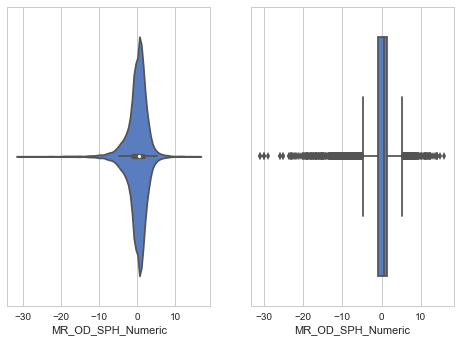

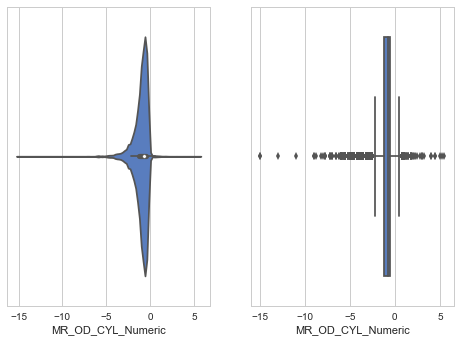

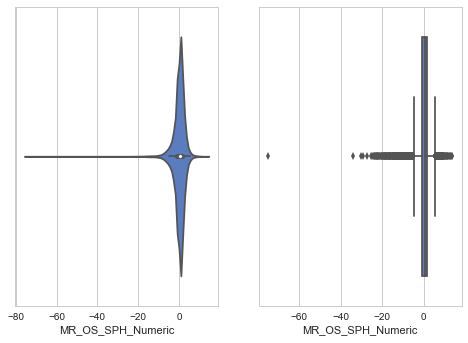

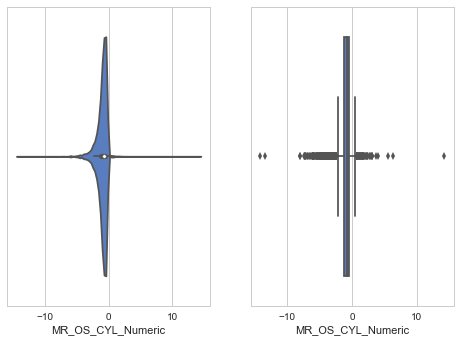

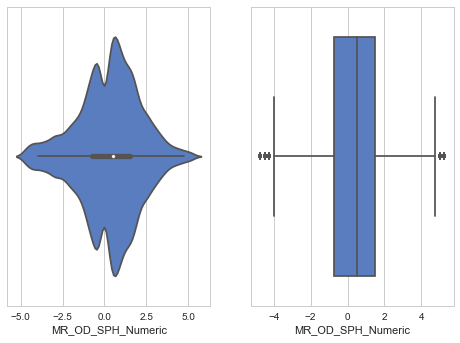

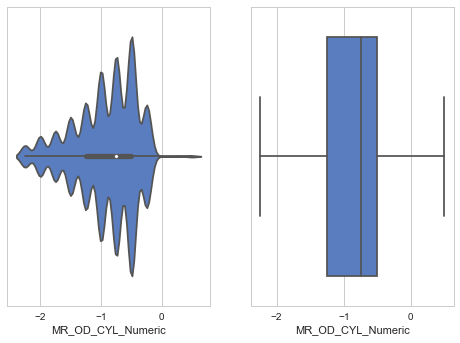

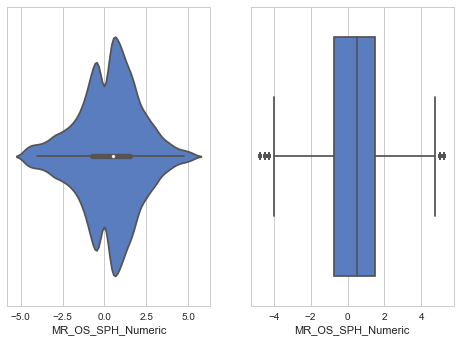

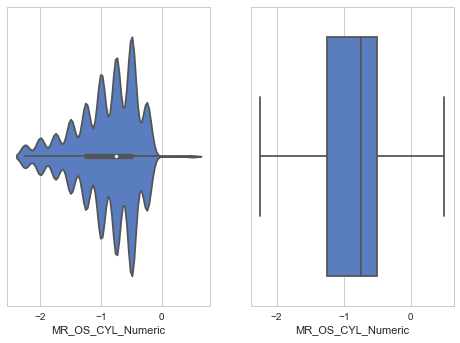

In [9]:
refrac_cols = [col_name+'_Numeric' for col_name in refractive_indices_columns_selected]
refrac_df = enc_df[refrac_cols].copy()
make_box_plots(refrac_df, refrac_cols)
for col_name in refrac_cols:
    quantiles = refrac_df[[col_name]].apply(get_quantiles).values[0]
    IQR = quantiles[3]-quantiles[1]
    def remove_values_outside_1_5_IQR(value):
        if value<(quantiles[1]-1.5*IQR) or value>(quantiles[3]+1.5*IQR):
            return float('nan')
        else:
            return value
    refrac_df[col_name] = refrac_df[col_name].apply(remove_values_outside_1_5_IQR)
make_box_plots(refrac_df, refrac_cols)

In [10]:
# non numeric freq dist before normalizing
enc_df[refractive_indices_columns_selected[0]+'_Non_numeric'].value_counts()

PL        2295
NI         152
BAL         99
BALANC      84
UTT         70
PLANO        7
NLP          4
NIWL         2
NOREF        2
NI+-3        2
NI+/-        2
BLC          1
ATT          1
+/-3D        1
+/-3         1
ATTEMP       1
HM           1
+/-3NI       1
+/-3.0       1
Name: MR_OD_SPH_Non_numeric, dtype: int64

In [11]:
# normalizing the non numeric columns
normalizing_dict = {'AM':'AM',
                    'BAL':'BAL','Bal':'BAL','bal':'BAL','Balan':'BAL','Balanc':'BAL','balanc':'BAL','BALANC':'BAL','BL':'BAL','bl':'BAL',
                    'Blanc':'BAL','BLC':'BAL','DS':'DS','ds':'DS',
#                         '+ -4D':'float('nan')','+/- 3':'float('nan')','+/- 3D':'float('nan')','+/-3.0':'float('nan')','+/-3':'float('nan')',
#                         '+/-3D':'float('nan')','+':'float('nan')','=-Reflx':'float('nan')','>-24.0':'float('nan')','>-30.0':'float('nan')',
#                         '20/100':'float('nan')','20/20':'float('nan')','20/20-':'float('nan')','20/25':'float('nan')','20/25-':'float('nan')',
#                         '20/30':'float('nan')','20/40':'float('nan')','attemp':'float('nan')','Black':'float('nan')','CAT':'float('nan')',
#                         'HM':'float('nan')','LPerc':'float('nan')','Lperc':'float('nan')','no rea':'float('nan')','no ref':'float('nan')',
#                         'Proste':'float('nan')','spasm':'float('nan')','supp.':'float('nan')','tic':'float('nan')','unable':'float('nan')',
#                         'No ref':'float('nan')'
                    '+/-3NI':'NI','att NI':'NI','N/I':'NI','NI +/-':'NI','NI +-3':'NI','NI':'NI','ni':'NI','NI+/-3':'NI','NIWL':'NI',
                    'NLP':'PL','nlp':'PL','PL':'PL','pl':'PL','Pl':'PL','plano':'PL','Plano':'PL',
                    'Sph':'SPH','sph':'SPH','SPH':'SPH','sphere':'SPH',
                    'ATT':'UTT','UTD':'UTT','UTT/NI':'UTT','UTT':'UTT','utt':'UTT','WM':'WM'}


for k, v in normalizing_dict.items():
    upper_cased_space_replaced_k = k.upper().replace(" ", "")
    if upper_cased_space_replaced_k not in normalizing_dict:
        normalizing_dict[upper_cased_space_replaced_k] =  v
        
def normalize_and_drop_anomalies(string_value):
    if string_value in normalizing_dict:
        return normalizing_dict[string_value]
    else:
        return float('nan')


for column_name in refractive_indices_columns_selected:
    enc_df[column_name+'_Non_numeric'] = enc_df[column_name+'_Non_numeric'].apply(normalize_and_drop_anomalies)

In [12]:
# non numeric freq dist after normalizing
enc_df[refractive_indices_columns_selected[0]+'_Non_numeric'].value_counts()

PL     2306
BAL     184
NI      159
UTT      71
Name: MR_OD_SPH_Non_numeric, dtype: int64

In [13]:
# saving extracted and cleaned refactive indices columns
file_name = '2017_03_30_refractive_index_columns.pickle'
columns_to_save = sum([[col_name, col_name+'_Numeric', col_name+'_Non_numeric'] for col_name in refractive_indices_columns_selected], [])
enc_df[columns_to_save].to_pickle(file_name)

Extracting visual ability values from visual acuity columns

In [14]:
acuity_columns = ['MR_OD_DVA', 'MR_OD_NVA', 'MR_OS_DVA', 'MR_OS_NVA',
'BB_OD_DVA', 'BB_OD_NVA', 'BB_OS_DVA', 'BB_OS_NVA',
'CYCLO_OD_DVA', 'CYCLO_OD_NVA', 'CYCLO_OS_DVA', 'CYCLO_OS_NVA',]

percentage_of_null_values_acuity_columns = enc_df[acuity_columns].isnull().sum()/len(enc_df)
# dropping columns with more than 80% null values
acuity_columns_selected = percentage_of_null_values_acuity_columns[percentage_of_null_values_acuity_columns<=0.8].index
percentage_of_null_values_acuity_columns

MR_OD_DVA       0.623355
MR_OD_NVA       0.717824
MR_OS_DVA       0.624988
MR_OS_NVA       0.718826
BB_OD_DVA       0.916411
BB_OD_NVA       0.924396
BB_OS_DVA       0.916492
BB_OS_NVA       0.924493
CYCLO_OD_DVA    0.991788
CYCLO_OD_NVA    0.996217
CYCLO_OS_DVA    0.991853
CYCLO_OS_NVA    0.996234
dtype: float64

In [15]:
for column_name in acuity_columns_selected:
    pattern = re.compile("(?P<"+ column_name+ "_ref"+">\d+)\s*\/\s*(?P<"+ column_name+ "_ability"+">\d+)")
    enc_df = pd.merge(enc_df, enc_df[column_name].str.extract(pattern, expand=True),
                         left_index=True, right_index=True)

In [16]:
# convert extracted columns to numeric
extracted_columns = sum([[col+'_ref', col+'_ability'] for col in acuity_columns_selected], [])
enc_df[extracted_columns] = enc_df[extracted_columns].apply(pd.to_numeric)

MR_acuity_columns = sum([[col, col+'_ref', col+'_ability'] for col in acuity_columns_selected], [])
enc_df[MR_acuity_columns].head()

,MR_OD_DVA,MR_OD_DVA_ref,MR_OD_DVA_ability,MR_OD_NVA,MR_OD_NVA_ref,MR_OD_NVA_ability,MR_OS_DVA,MR_OS_DVA_ref,MR_OS_DVA_ability,MR_OS_NVA,MR_OS_NVA_ref,MR_OS_NVA_ability
Enc_Nbr,,,,,,,,,,,,
1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1802,20/20,20.0,20.0,NaN,NaN,NaN,20/20,20.0,20.0,NaN,NaN,NaN
2698,20/20,20.0,20.0,NaN,NaN,NaN,20/25,20.0,25.0,NaN,NaN,NaN
2966,20/40,20.0,40.0,20/40,20.0,40.0,20/40,20.0,40.0,20/40,20.0,40.0
4091,20/20-,20.0,20.0,20/20-,20.0,20.0,20/20-,20.0,20.0,20/20-,20.0,20.0


In [17]:
# comparing % of null values after extraction
enc_df[MR_acuity_columns].isnull().sum()/len(enc_df)

MR_OD_DVA            0.623355
MR_OD_DVA_ref        0.628043
MR_OD_DVA_ability    0.628043
MR_OD_NVA            0.717824
MR_OD_NVA_ref        0.721558
MR_OD_NVA_ability    0.721558
MR_OS_DVA            0.624988
MR_OS_DVA_ref        0.629660
MR_OS_DVA_ability    0.629660
MR_OS_NVA            0.718826
MR_OS_NVA_ref        0.722107
MR_OS_NVA_ability    0.722107
dtype: float64

There are only small increases in null values in the extracted columns indicating that most of the cells with values have been successfully extracted.

In [18]:
# inspect some extracted columns
col_name = acuity_columns_selected[0]
enc_df[pd.notnull(enc_df[col_name])][[col_name, col_name+'_ref', col_name+'_ability']].head(20)

,MR_OD_DVA,MR_OD_DVA_ref,MR_OD_DVA_ability
Enc_Nbr,,,
1802,20/20,20.0,20.0
2698,20/20,20.0,20.0
2966,20/40,20.0,40.0
4091,20/20-,20.0,20.0
4487,20/20,20.0,20.0
5379,20/25,20.0,25.0
6328,20/20,20.0,20.0
6601,20/20-,20.0,20.0
6983,20/20,20.0,20.0


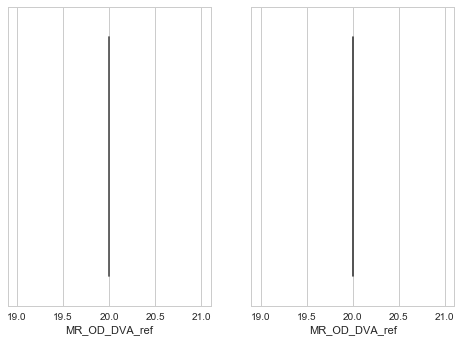

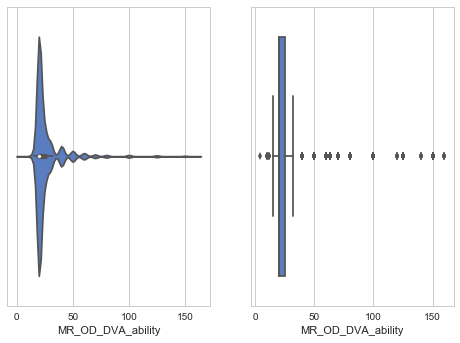

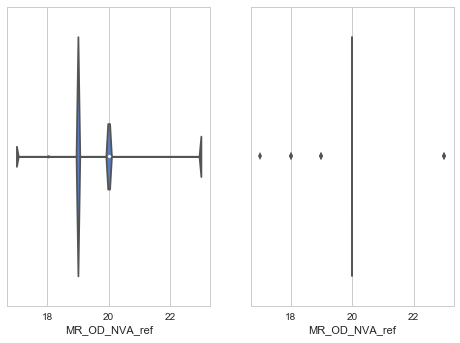

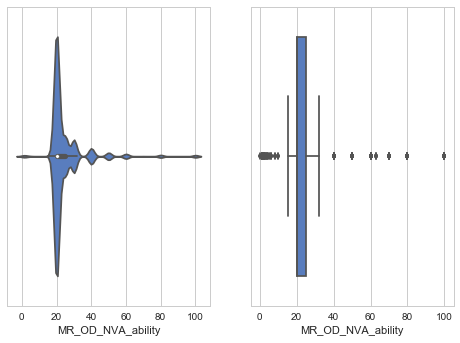

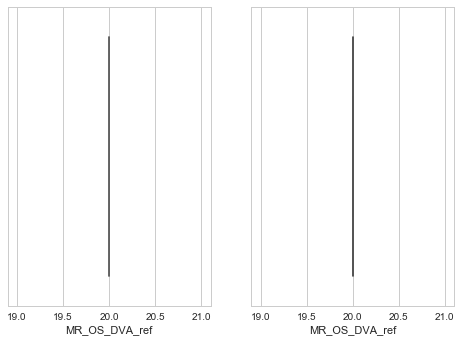

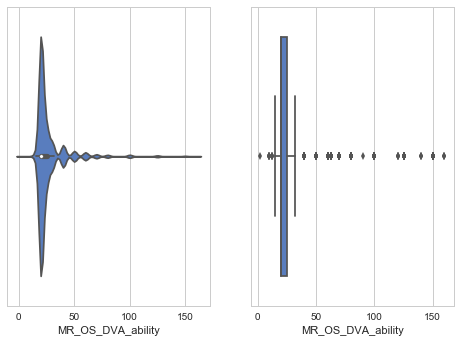

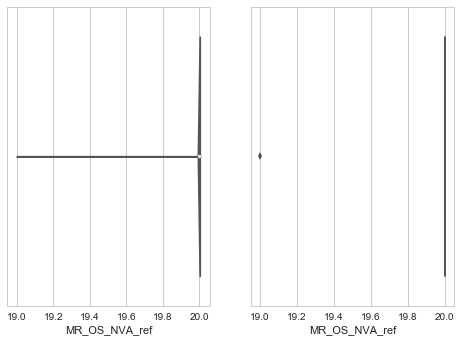

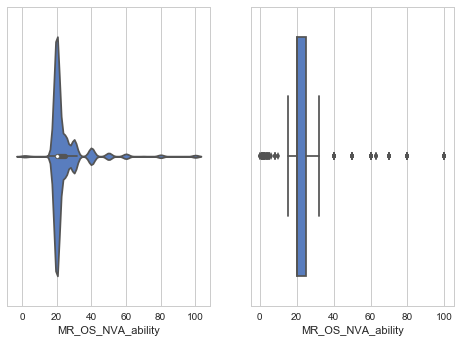

In [19]:
# converting values outside +/- 3 std. dev. and then values outside 1.5 IQR

extracted_columns = sum([[col+'_ref', col+'_ability'] for col in acuity_columns_selected], [])
acuity_df = enc_df[extracted_columns].copy()

for col_name in extracted_columns:
    
    mean = acuity_df[col_name].mean()
    stddev = acuity_df[col_name].std()
    def remove_values_outside_3stddev(value):
        if abs((value - mean)/stddev) > 3:
            return float('nan')
        else:
            return value
        
    
    acuity_df[col_name] = acuity_df[col_name].apply(remove_values_outside_3stddev) 

make_box_plots(acuity_df, extracted_columns)

# removing values outside 1.5 IQR removes pretty much all variation so filtering just by std dev may be enough

# for col_name in extracted_columns:
#     quantiles = acuity_df[[col_name]].apply(get_quantiles).values[0]
#     IQR = quantiles[3]-quantiles[1]
    
#     def remove_values_outside_1_5_IQR(value):
#         if value<(quantiles[1]-1.5*IQR) or value>(quantiles[3]+1.5*IQR):
#             return float('nan')
#         else:
#             return value
    
#     acuity_df[col_name] = acuity_df[col_name].apply(remove_values_outside_1_5_IQR) 
# make_box_plots(acuity_df, extracted_columns)

In [20]:
# saving new df with the procesed columns
# saving extracted and cleaned refactive indices columns
file_name = '2017_03_30_visual_acuity_columns.pickle'
extracted_columns = sum([[col+'_ref', col+'_ability'] for col in acuity_columns_selected], [])
acuity_df[extracted_columns].to_pickle(file_name)